# Eclairement solaire moyen journalier au sommet de l'atmosphère




## Objectif

L'idée est ici de montrer que la hauteur du Soleil au-dessus de l’horizon n'est pas le seul facteur essentiel qui détermine le climat. La durée du jour est aussi un élément essentiel pour discuter de l’énergie reçue à différents endroits et différentes saisons sur Terre : au solstice d’été, le pôle Nord bénéficie de 24 heures de soleil, contre 12 heures seulement à l’équateur.

Durant l’été de l’hémisphère nord, on peut alors constater que le pôle nord reçoit quotidiennement plus d’énergie au sommet de l'atmosphère que les tropiques, contrairement à ce que notre intuition pourrait nous dicter.

Le programme fourni reproduit les résultats présentés dans l'article **Climat et astronomie** de Didier Paillard. En modifiant les paramètres par défaut qui sont ceux permettant de décrire le mouvement apparent du Soleil au cours d'une année, on peut aussi tester par exemple l'effet de l'inclinaison de l'axe de rotation sur une "Terre fictive".

## Les sources

Article ENS Lyon : [**Les saisons sur Terre, répartition de l'énergie solaire et paramètres orbitaux**](https://planet-terre.ens-lyon.fr/ressource/saisons.xml)

Article de Didier Paillard : [**Climat et astronomie**](http://clea-astro.eu/archives/cahiers-clairaut/CLEA_CahiersClairaut_170_04.pdf)

Page pour le calcul de la position du Soleil au cours de l'année : [**Ephemerides du JPL**](https://ssd.jpl.nasa.gov/horizons/app.html#/)

## Les paramètres astronomiques utiles

Pour les calculs, il faut disposer de l'anomalie moyenne au 1er janvier 2024 (Reference frame: ICRF, Reference plane: ecliptic x-y plane derived from reference frame (standard obliquity, inertial)). Dans le tableau ci-dessous, on lit **3.568306963251475E+02** (Mean anomaly), soit $M_0 \approx 356.83°$.

Il faut disposer aussi de la longitude écliptique du Soleil au périhélie. Dans le tableau ci-dessous, on lit **1.738524823660708E+02** (Longitude of Ascending Node) et **2.891365971401908E+02** (Argument of Perifocus). La somme de ces deux angles donne la longitude écliptique de la Terre (origine Soleil). Pour obtenir la longitude écliptique du Soleil (origine Terre), il faut retrancher 180°, soit $W \approx 282.99°$.

Le calcul d'éphéméride est obtenu via l'application "JPL Horizons", avec la configuration ci-dessous.
```
Ephemeris Type: Osculating Orbital Elements
Target Body: Earth-Moon Barycenter [EMB]
Coordinate Center: Sun (body center) [500@10]
Time Specification: Start=2024-01-01 TDB , Stop=2024-01-02, Step=1 (days)
Table Settings: custom
```

Le résultat est un fichier texte, avec l'en-tête ci-dessous.
```
*******************************************************************************
Ephemeris / WWW_USER Fri Aug 23 15:00:56 2024 Pasadena, USA      / Horizons
*******************************************************************************
Target body name: Earth-Moon Barycenter (3)       {source: DE441}
Center body name: Sun (10)                        {source: DE441}
Center-site name: BODY CENTER
*******************************************************************************
Start time      : A.D. 2024-Jan-01 00:00:00.0000 TDB
Stop  time      : A.D. 2024-Jan-02 00:00:00.0000 TDB
Step-size       : 1440 minutes
```

Les paramètres orbitaux sont alors disponibles aux dates choisies.
```
            JDTDB,            Calendar Date (TDB),                     EC,                     QR,                     IN,                     OM,                      W,                     Tp,                      N,                     MA,                     TA,                      A,                     AD,                     PR,
**************************************************************************************************************************************************************************************************************************************************************************************************************************************************
$$SOE
2460310.500000000, A.D. 2024-Jan-01 00:00:00.0000,  1.669113318183532E-02,  1.471011280790811E+08,  3.202477893480893E-03,  1.738524823660708E+02,  2.891365971401908E+02,  2.460313715585590E+06,  1.140748845453020E-05,  3.568306963251475E+02,  3.567227040257570E+02,  1.495980897183176E+08,  1.520950513575542E+08,  3.155821734424239E+07,
2460311.500000000, A.D. 2024-Jan-02 00:00:00.0000,  1.669059846386101E-02,  1.471011274005475E+08,  3.202314721667342E-03,  1.738624259488650E+02,  2.891270302646226E+02,  2.460313715955906E+06,  1.140749783845512E-05,  3.578159365449651E+02,  3.577414969773283E+02,  1.495980076776894E+08,  1.520948879548313E+08,  3.155819138412860E+07,
$$EOE
**************************************************************************************************************************************************************************************************************************************************************************************************************************************************
```

La signification des paramètres est documentée ci-dessous.
```
  Symbol meaning:

    JDTDB    Julian Day Number, Barycentric Dynamical Time
      EC     Eccentricity, e
      QR     Periapsis distance, q (km)
      IN     Inclination w.r.t X-Y plane, i (degrees)
      OM     Longitude of Ascending Node, OMEGA, (degrees)
      W      Argument of Perifocus, w (degrees)
      Tp     Time of periapsis (Julian Day Number)
      N      Mean motion, n (degrees/sec)
      MA     Mean anomaly, M (degrees)
      TA     True anomaly, nu (degrees)
      A      Semi-major axis, a (km)
      AD     Apoapsis distance (km)
      PR     Sidereal orbit period (sec)
```

## Le programme

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# L'anomalie moyenne M (en radian), proportionnelle au temps, permet
# d'obtenir l'anomalie excentrique E (en radian)
# (résolution itérative de l'équation de Kepler M=E-e*sin(E))
# puis l'anomalie vraie V (en radian)


def eq_kepler(M, e):
    E = np.pi
    M = np.remainder(M, 2*np.pi)
    for n in range(5):
        E = (M-e*(E*np.cos(E)-np.sin(E)))/(1-e*np.cos(E))
    return E


def calc_anom_vraie(E, e):
    V = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
    return V

# S0 : constante solaire (en W/m^2)
# Epsilon : inclinaison de l'axe de rotation terrestre (en degré)
# W : longitude écliptique du Soleil au périhélie (en degré)
# M0 : anomalie moyenne au 1er janvier (en degré)
# e : excentricité de l'orbite terrestre
# Les paramètres par défaut sont ceux permettant de décrire
# le mouvement apparent du Soleil au cours d'une année.


def calcul_eclairement(S0=1365, Epsilon=23.44, W=282.99, M0=356.83, e=0.0167):
    Epsilon = Epsilon*np.pi/180.0
    W = W*np.pi/180.0
    pas_calc = 0.2
    M_liste = np.pi*(np.arange(0, 360, pas_calc)+M0)/180
    E = [eq_kepler(M_liste[k], e) for k in range(len(M_liste))]
    V = np.array([calc_anom_vraie(E[k], e) for k in range(len(E))])
    Lambda, Phi = np.meshgrid(V+W, np.pi*np.arange(-90, 90, pas_calc)/180)
    M, Phi = np.meshgrid(M_liste, np.pi*np.arange(-90, 90, pas_calc)/180)
    Delta = np.arcsin(np.sin(Lambda)*np.sin(Epsilon))
    un_sur_r = (1+e*np.cos(Lambda-W))/(1-e**2)
    cosH0 = -np.tan(Phi)*np.tan(Delta)
    cosH0[np.where(cosH0 > 1)] = 1
    cosH0[np.where(cosH0 < -1)] = -1
    H0 = np.arccos(cosH0)
    PM = S0*un_sur_r**2 * (H0*np.sin(Phi)*np.sin(Delta) +
                           np.cos(Phi)*np.cos(Delta)*np.sin(H0))/np.pi
    H0 = H0*180/np.pi
    M = M*180/np.pi
    Phi = Phi*180/np.pi
    return PM, H0, M, Phi, M0


def trace_resultat(PM, H0, M, Phi, M0):

    fig, ax = plt.subplots(figsize=(10, 5))
    CS = ax.contour((M-M0)*365.25/360, Phi, PM,
                    np.arange(0, np.max(PM)+100, 50), cmap='plasma')
    ax.clabel(CS, CS.levels, inline=True, fontsize=8)
    ax.set_xlabel('Temps (en jours depuis le 1er janvier 2024)')
    ax.set_ylabel('Latitude (en degré)')
    ax.set_title('Eclairement moyen journalier (en $W/m^2$)')
    plt.axis('equal')
    plt.xticks(np.arange(0, 361, 30))
    plt.yticks(np.arange(-90, 91, 10))
    plt.grid('on')

    fig, ax = plt.subplots(figsize=(10, 5))
    CS = ax.contour((M-M0)*365.25/360, Phi, 24*H0/180,
                    [0, 7, 8, 9, 10, 11, 11.5, 12, 12.5, 13, 14, 15, 16, 17, 23.99, 30], cmap='plasma')
    ax.clabel(CS, CS.levels, inline=True, fontsize=8)
    ax.set_xlabel('Temps (en jours depuis le 1er janvier 2024)')
    ax.set_ylabel('Latitude (en degré)')
    ax.set_title('Durée du jour (en h)')
    plt.axis('equal')
    plt.xticks(np.arange(0, 361, 30))
    plt.yticks(np.arange(-90, 91, 10))
    plt.grid('on')

    plt.show()


## Le résultat avec les paramètres par défaut

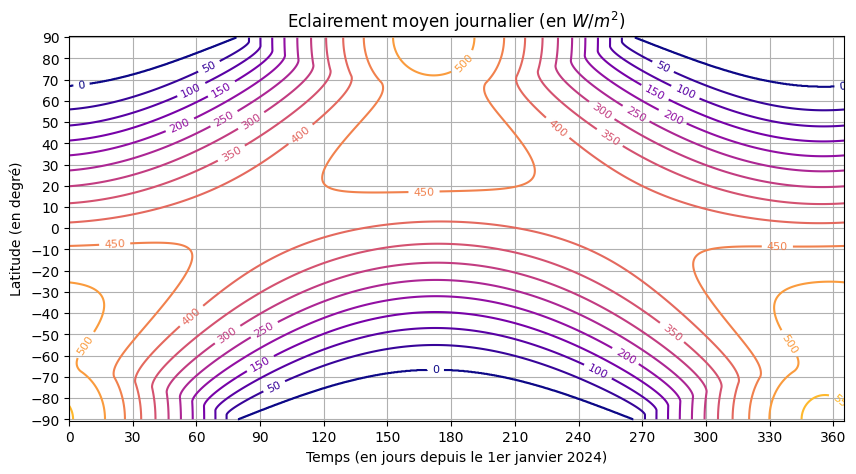

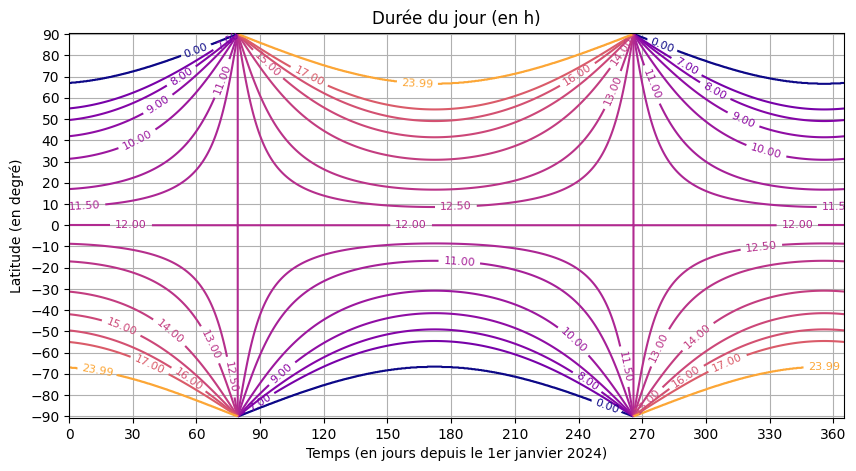

In [ ]:
PM,H0,M,Phi,M0=calcul_eclairement()
trace_resultat(PM,H0,M,Phi,M0)

## Une "Terre fictive" avec un axe de rotation incliné de 80°

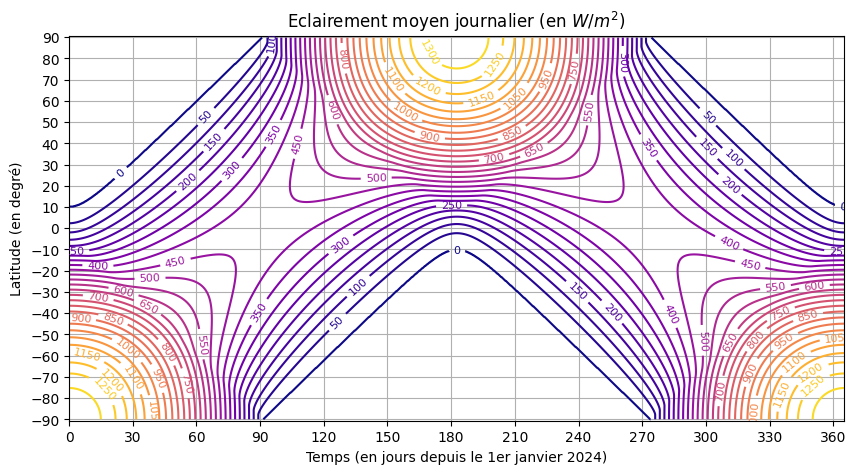

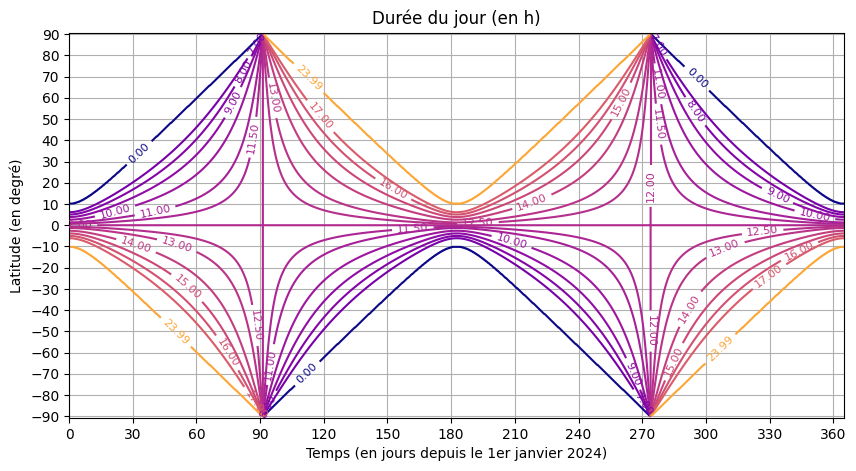

In [ ]:
PM,H0,M,Phi,M0=calcul_eclairement(S0=1365,Epsilon = 80,W = 270,M0 = 0,e = 0)
trace_resultat(PM,H0,M,Phi,M0)